# <font color='289C4E'>Exploration Numérique 1
**Élèves**: Sadegh ABDERRAHIM & Gabriel PEREIRA DE CARVALHO & Otávio RIBAS

### <font color='289C4E'>Table des matières<font><a class='anchor' id='top'></a>
- [Python Imports](#imports)
- [Exercice 1](#1)
- [Exercice 2](#2)
- [Exercice 3](#3)
- [Exercice 4](#4)
- [Exercice 5](#5)
- [Exercice 6](#6)
- [Exercice 7](#7)

<h2 align="center"> <font color='gray'>Python Imports</font></h2> <a class="anchor" id="imports"></a>

Dans cette section, on va importer tous les paquets qu'on ira utiliser plus tard.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats

<h2 align="center"> <font color='blue'>Exercice 1</font></h2> <a class="anchor" id="1"></a>

D'aprés ce qu'on a traité dans le PC on a que  :

$ \begin{equation} \hat{\beta} = (T^{T}T)^{-1}T^{T}X \end{equation}$ avec $\begin{equation}\hat{\beta} = \begin{pmatrix} \hat{\beta}_1 \\ \hat{\beta}_2 \end{pmatrix} \end{equation}$ et    $\begin{equation} T = \begin{bmatrix} \mathbf{1} & \mathbf{t} \end{bmatrix}\end{equation} $ .

comme $\begin{equation} T^T T = \begin{bmatrix} n & \sum_{i=1}^{n} T_i \\
    \sum_{i=1}^{n} T_i & \sum_{i=1}^{n} T_i^{2} \end{bmatrix} \end{equation}$
alors $   \begin{equation} (T^T T)^{-1} = \frac{1}{n\sum_{i=1}^{n} T_i^{2}-(\sum_{i=1}^{n} T_i)^{2}} \begin{bmatrix} \sum_{i=1}^{n} T_i^{2} & -\sum_{i=1}^{n} T_i \\  -\sum_{i=1}^{n} T_i & n \end{bmatrix} \end{equation}$ , ainsi d'aprés un simple calcul on obtient que :


$$\begin{equation} \hat{\beta}_2 =\frac{\sum_{i=1}^{n} (t_i -\bar{t})X_i}{\sum_{i=1}^{n} (t_i -\bar{t})^2} \end{equation}$$

$$\begin{equation} \hat{\beta}_1 = \bar{X}-\hat{\beta}_2\bar{t} \end{equation}$$

<h2 align="center"> <font color='blue'>Exercice 2</font></h2> <a class="anchor" id="2"></a>

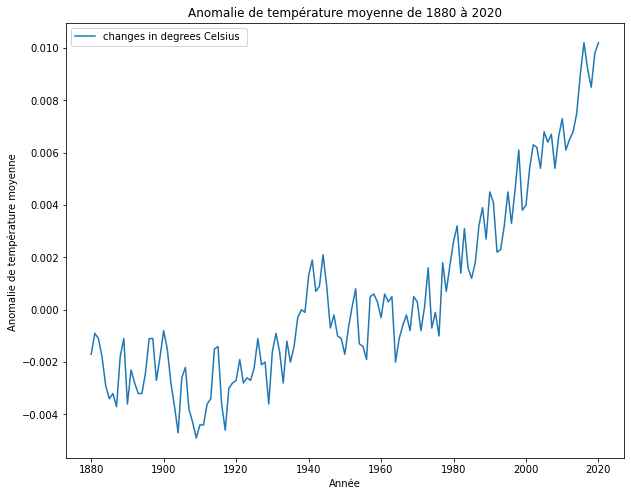

In [2]:
# charger les données 
url= "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"
data=pd.read_csv(url, skiprows=1) # pour qu'il saute la première ligne qui contient juste 

# Convertir la colonne "year" en datetime pour qu'elle soit reconnue comme une année
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Filtrer les données pour la période de 1880 à 2020
data = data[(data['Year'].dt.year >= 1880) & (data['Year'].dt.year <= 2020)]

# Convertir la colonne 'J-D' en type numérique (float) et diviser par 100
data['J-D'] = data['J-D'].str.replace(',', '').astype(float) /100

# traçons la courbe de la valeur moyenne des annomalies de température de 1880 à 2020 
plt.figure(figsize=(10, 8))
plt.plot(data['Year'], data['J-D'], label='changes in degrees Celsius ' )
plt.xlabel('Année')
plt.ylabel('Anomalie de température moyenne ')
plt.title('Anomalie de température moyenne de 1880 à 2020')
plt.legend()
plt.show()

<h2 align="center"> <font color='blue'>Exercice 3</font></h2> <a class="anchor" id="3"></a>

In [3]:
liste_beta_1=[]
liste_beta_2=[]
liste_std=[]
liste_std_1=[]
liste_std_2=[]

for j in range(0,10):
    t=np.array([ i for i in range(1880+j*10,1921+j*10)])

    #Construction du liste d'observation X1 ,.....,X40
    obs = [] 
    debut_annee = pd.to_datetime(str(1880+j*10), format='%Y')
    fin_annee = pd.to_datetime(str(1920+j*10), format='%Y')
    periode = (data['Year'] >= debut_annee) & (data['Year'] <= fin_annee)
    T = data.loc[periode, 'Year']

    # Construction de la liste d'observation X1, ..., X40
    obs = []
    for annee in T:
        # on utilise la méthode loc pour accéder à la valeur de 'J-D' pour 'Year' égal à annee
        valeur = data.loc[data['Year'] == annee, 'J-D'].values[0]
        obs.append(valeur)
    X = np.array(obs)

    # calcul du beta 2 
    s1=0
    s2=0
    for i in range(40):
        s1+= (t[i]-np.mean(t))*X[i]
        s2+= (t[i]-np.mean(t))**2

    
    beta_2= s1/s2
    
    #calcul du beta 1 
    beta_1= np.mean(X)-beta_2*np.mean(t)
    
    #calcul du standard deviation 
    std= (1/40) * np.sum([(X[i]-beta_1-beta_2*t[i])**2 for i in range(40)])
    
    #calcul du std_1et std_2
    std_1=std*(np.sum([i**2 for i in t])/(40*(np.sum([(i-np.mean(t))**2 for i in t]))))
    std_2=std/(np.sum([(i-np.mean(t))**2 for i in t]))
                                          
    
    liste_beta_1.append(beta_1)
    liste_beta_2.append(beta_2)
    liste_std.append(std)
    liste_std_1.append(std_1)
    liste_std_2.append(std_2)                                     

    
# affichons les valeurs pour chaque intervalle 
print(liste_beta_1)
print(liste_beta_2)
print(liste_std)

[0.054184936512286425, -0.02161791815109163, -0.1398896958070704, -0.23691290307846904, -0.1408147437654152, -0.03223531104412166, 0.006537973874120752, -0.17956777199232668, -0.267092408879145, -0.32602798940348954]
[-2.9962546816479377e-05, 9.868913857677905e-06, 7.161048689138574e-05, 0.00012192883895131089, 7.213483146067417e-05, 1.6348314606741564e-05, -3.2958801498127285e-06, 9.146067415730338e-05, 0.0001357303370786517, 0.00016546816479400748]
[1.1439117120850583e-06, 1.1629145653837672e-06, 1.1690392273637708e-06, 1.0503011956444234e-06, 1.281626674531614e-06, 1.2094041883342589e-06, 1.1340572008814088e-06, 1.055548963297662e-06, 9.915304854654496e-07, 8.436581323093163e-07]


<h2 align="center"> <font color='blue'>Exercice 4</font></h2> <a class="anchor" id="4"></a>

On a : 

$$ \frac{\hat{\sigma}_{n}^2 \cdot (n - 2)}{\sigma^{2}} \sim \chi^2_{(n-2)} $$

et donc  en notant $q_{\frac{\alpha}{2}}^{n-2}  $  et   $q_{1-\frac{\alpha}{2}}^{n-2} $ les quantiles d’ordre $\frac{\alpha}{2}$ et $1 - \frac{\alpha}{2}$ d’une loi $\chi^2_{(n-2)}$  ,  nous avons que : 
$$ \lbrack n\frac{\hat{\sigma}^{2}}{q_{1-\frac{\alpha}{2}}^{n-2}} ; n\frac{\hat{\sigma}^{2}}{q_{\frac{\alpha}{2}}^{n-2}} \rbrack $$ 


est un intervalle de confiance de niveau $1 - \alpha$ pour l’estimation de $\sigma^{2}$. dans notre cas on prend $n=40$ et $\alpha = 0.05$

In [4]:
#calculons la valeur des quantiles 
quantile_1= quantile = stats.chi2.ppf(1 - (0.05/2), 40-2)
quantile_2= quantile = stats.chi2.ppf((0.05/2), 40-2)



# pour chaque intervalle de temps on donne l'intervalle de confiance de couverture 0.95
for j in range(0,10):
    borne_1= (40*liste_std[j])/quantile_1
    borne_2= (40*liste_std[j])/quantile_2
    print(f"[{borne_1} ; {borne_2}]")
    

[8.042191731985237e-07 ; 1.9999783126320416e-06]
[8.175789970440585e-07 ; 2.0332022879389053e-06]
[8.21884898051664e-07 ; 2.0439104492443632e-06]
[7.384069506823718e-07 ; 1.836312707378029e-06]
[9.010387197297506e-07 ; 2.2407547076179926e-06]
[8.502632031209479e-07 ; 2.1144832440486638e-06]
[7.972910276355858e-07 ; 1.9827490033412358e-06]
[7.420963572324041e-07 ; 1.8454877349481887e-06]
[6.970886116452853e-07 ; 1.7335598947840525e-06]
[5.931279822210253e-07 ; 1.4750246457558983e-06]


Pour j=1,2 on a que $$\frac{\hat{\beta_{j}}-\beta_{j}}{\hat{\sigma_{j}}} \sim t_{n-2} $$

et donc de meme en notant $q_{\frac{\alpha}{2}}^{n-2}  $  et   $q_{1-\frac{\alpha}{2}}^{n-2} $ les quantiles d’ordre α/2 et 1 − α/2 d’une loi $t_{n-2}$  ,  nous avons que : 
$$ \lbrack  \beta_{j}-q_{1-\frac{\alpha}{2}}\hat{\sigma_{j}}  ; \beta_{j}-q_{\frac{\alpha}{2}}\hat{\sigma_{j}} \rbrack $$ 


est un intervalle de confiance de niveau 1 − α pour l’estimation de $\beta_{j}$ . dans notre cas on prend n=40 et α=0.05 





Pour $\beta_{2}$ :

In [5]:
# calculons la valeur des quantiles
quantile_a= quantile = stats.t.ppf(1 - (0.05/2), 40-2)
quantile_b= quantile = stats.t.ppf((0.05/2), 40-2)

# pour chaque intervalle de temps on donne l'intervalle de confiance de couverture 0.95
for i in range(0,10):
    borne_a= liste_beta_2[i]-quantile_a*liste_std_2[i] 
    borne_b= liste_beta_2[i]-quantile_b*liste_std_2[i]
    print(f"[{borne_a} ; {borne_b}]")

[-2.9962950253447102e-05 ; -2.996214337951165e-05]
[9.86850371874758e-06 ; 9.86932399660823e-06]
[7.161007459239793e-05 ; 7.161089919037355e-05]
[0.00012192846852907893 ; 0.00012192920937354285]
[7.213437945413043e-05 ; 7.21352834672179e-05]
[1.6347888071762214e-05 ; 1.6348741141720915e-05]
[-3.2962801112726168e-06 ; -3.2954801883528402e-06]
[9.146030188427869e-05 ; 9.146104643032807e-05]
[0.00013572998738378605 ; 0.00013573068677351734]
[0.00016546786725104583 ; 0.00016546846233696913]


Et pour $\beta_{1}$ :

In [6]:
# pour chaque intervalle de temps on donne l'intervalle de confiance de couverture 0.95
for i in range(0,10):
    borne_c= liste_beta_1[i]-quantile_a*liste_std_1[i] 
    borne_d= liste_beta_1[i]-quantile_b*liste_std_1[i]
    print(f"[{borne_c} ; {borne_d}]")

[0.052692060979261865 ; 0.055677812045310984]
[-0.02315161053353766 ; -0.020084225768645596]
[-0.14144765143535795 ; -0.13833174017878283]
[-0.2383272366502217 ; -0.23549856950671638]
[-0.1425585097520867 ; -0.1390709777787437]
[-0.03389781899234919 ; -0.030572803095894125]
[0.004963012236736765 ; 0.00811293551150474]
[-0.18104869865456488 ; -0.17808684533008848]
[-0.26849767640539535 ; -0.2656871413528946]
[-0.3272357894804466 ; -0.32482018932653245]


$\textbf{5})$